# Factor affecting the Borrower's APR on Loan
## by Aastha Arora

## Investigation Overview

In this investigation, I wanted to explore the factors that affect the Borrower's Annual Percentage Rate (APR) for the loan. The main focus was to understand the relationship of Borrower APR with Credit Rating, Income and Loan Amount.

## Dataset Overview

The dataset provides loan data from Prosper Loan for more than 110,000 loan transactions. It includes 81 variables. The dataset was filtered on selected 15 columns to perform this investigation.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv', parse_dates=['ListingCreationDate'])

In [3]:
#Filter and clean the dataset
loan_df = df[['ListingCreationDate', 'CreditGrade', 'LoanStatus', 'BorrowerAPR', \
           'BorrowerRate', 'ProsperRating (Alpha)','ProsperScore', 'EmploymentStatus', 'EmploymentStatusDuration', \
           'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'DebtToIncomeRatio', 'IncomeRange', \
           'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment']].copy()
loan = loan_df.copy()
loan['ProsperRating'] = loan['CreditGrade'].astype(str).replace('nan','') + \
                        loan['ProsperRating (Alpha)'].astype(str).replace('nan','')
loan.drop(columns = ['CreditGrade','ProsperRating (Alpha)'], inplace=True)
loan.loc[(loan.ProsperRating == '') | (loan.ProsperRating == 'NC'), 'ProsperRating'] = np.nan

In [4]:
# convert ProsperRating into ordered categorical type
categories = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']

ordered_rating = pd.api.types.CategoricalDtype(ordered = True, categories = categories)
loan['ProsperRating'] = loan['ProsperRating'].astype(ordered_rating)

In [5]:
# convert IncomeRating into ordered categorical type
income_categories = ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999',\
                    '$50,000-74,999', '$75,000-99,999', '$100,000+' ]

ordered_income_rating = pd.api.types.CategoricalDtype(ordered = True, categories = income_categories)
loan['IncomeRange'] = loan['IncomeRange'].astype(ordered_income_rating)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Borrower APR 

The distribution of Borrower APR has a peak around 0.35. The distribution was plotted using two different bin sizes to understand the distribution better.

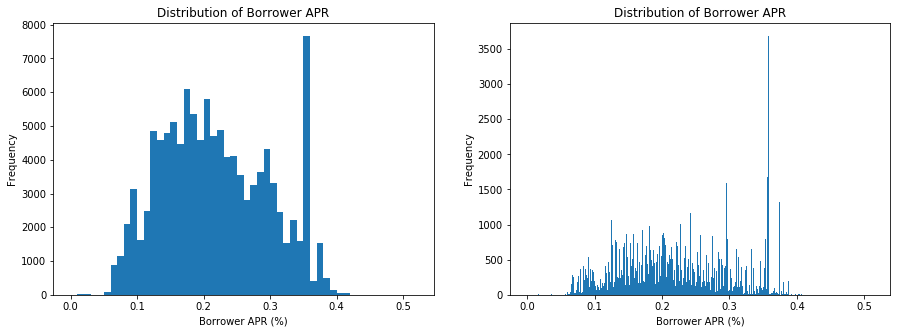

In [14]:
plt.figure(figsize = [15, 5]) 
plt.title('Distribution of Borrower APR')

plt.subplot(1, 2, 1) 
bins = np.arange(0, loan.BorrowerAPR.max()+0.01, 0.01)
plt.hist(data = loan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR (%)');
plt.title('Distribution of Borrower APR')
plt.ylabel('Frequency');

plt.subplot(1, 2, 2)
bins = np.arange(0, loan.BorrowerAPR.max()+0.001, 0.001)
plt.hist(data = loan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR (%)')
plt.title('Distribution of Borrower APR')
plt.ylabel('Frequency');

## Distribution of Prosper Rating and Prosper Scores

Prosper Rating are assigned a value between AA - HR at the time the listing was created. ProsperRating column is an ordered categorical column. Ratings range from AA, A, B, C, D, E to HR where AA is the lowest risk down to HR which stands for 'high risk'. 

Prosper score  ranges from 1 to 11, with 11 being the best, or lowest risk, score. The worst, or highest risk, score, is a 1.

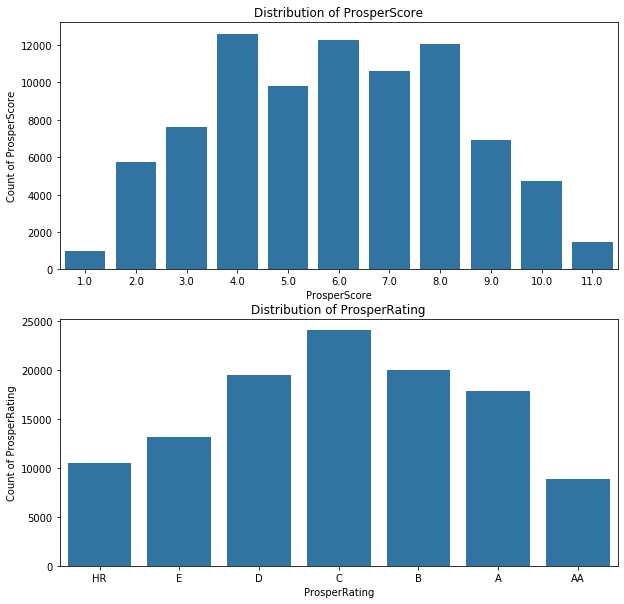

In [7]:
# Plot a standard-scaled plot for ProsperScore and ProsperRating
fig, ax = plt.subplots(nrows=2, figsize = [10,10])

variables = ['ProsperScore', 'ProsperRating']

for i in range(len(variables)):
    var = variables[i]
    sb.countplot(data = loan, x = var, ax = ax[i], color = sb.color_palette()[0]).set_title(f'Distribution of {var}')
    ax[i].set(xlabel=f"{var}", ylabel = f"Count of {var}")
plt.show()

## Distribution of Original Loan Amount

A borrower can lend anywhere from  USD 2,000 to USD 40,000. In the data analyzed, the most popular loan amount is USD 4000. Loan amounts in the multiples of 5000 are more popular (e.g. 10000, 15000)

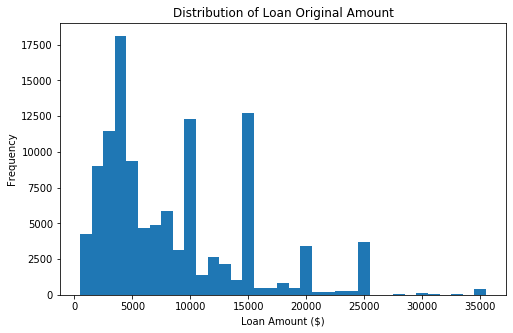

In [8]:
# Distribution for LoanOriginalAmount
binsize = 1000
bins = np.arange(500, loan['LoanOriginalAmount'].max()+binsize+500, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Original Amount');

# Relation between Prosper Score and Prosper Ratings

The borrowers with low prosper score also have low prosper rating while the borrowers with high prosper score also have high prosper rating.

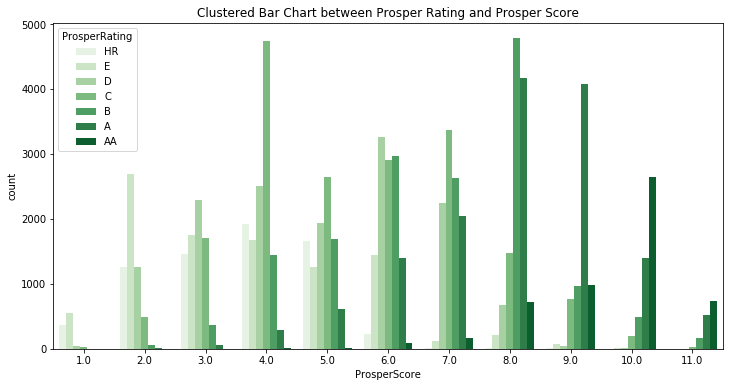

In [9]:
# Bar Chart between two ordered categorical varibles
plt.figure(figsize = [12, 6])
sb.countplot(data = loan, hue = 'ProsperRating', x = 'ProsperScore', palette = 'Greens')
plt.title('Clustered Bar Chart between Prosper Rating and Prosper Score');

# Effect of ProsperRating on Borrower APR

As the ProsperRating (as well as Prosper Score) increases, Borrower APR decrease. These two variables have a strong negative correlation. This implies that to get a better interest rate, borrower should have a good Prosper Rating.

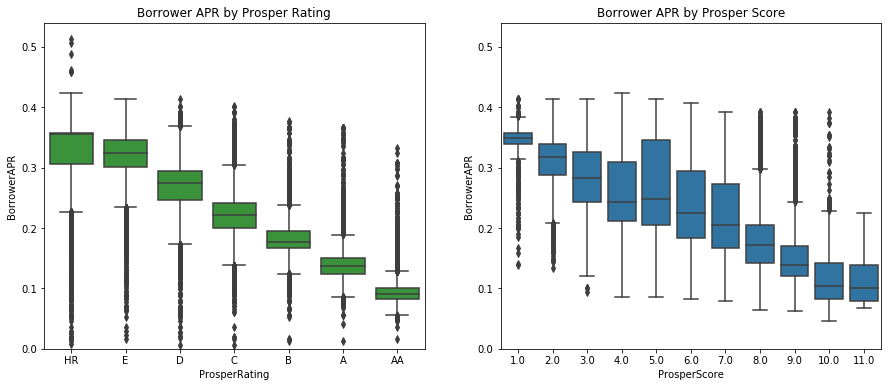

In [10]:
# Boxplot 
plt.figure(figsize = [15, 6]) 
plt.subplot(1, 2, 1)
sb.boxplot(data=loan, x='ProsperRating', y='BorrowerAPR', \
              color = sb.color_palette()[2])
plt.ylim(0, 0.54)
plt.title('Borrower APR by Prosper Rating');
plt.subplot(1, 2, 2)
sb.boxplot(data=loan, x='ProsperScore', y='BorrowerAPR', \
              color = sb.color_palette()[0])
plt.ylim(0, 0.54);
plt.title('Borrower APR by Prosper Score');

# Effect of Loan Amount on Borrower APR

In general, as the Proper Rating improves, the borrower can obtain a better APR (i.e., get a lower Annual Percentage Rate for the loan.

Original Loan Amount has some relationship with Borrower API. For 'HR' rating, borrowers get a smaller loan at comparitively high APR. With a Prosper Rating of 'AA', a borrower is eligible to get a loan of any amount and also pays lower APR on the loan.

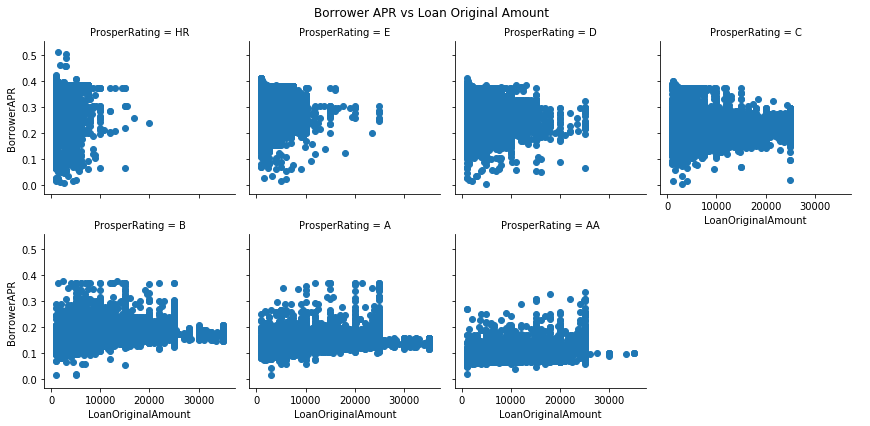

In [11]:
# Create faceted scatter plot on levels of Prosper Rating
g = sb.FacetGrid(data = loan, col = 'ProsperRating', col_wrap=4)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR')
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Borrower APR vs Loan Original Amount');

# Effect of Income Range and Loan Status on Borrower APR

A person who is not employed gets a higer APR and is more likely to default on the payment of loan. Where as a person with high income is less likely to default.

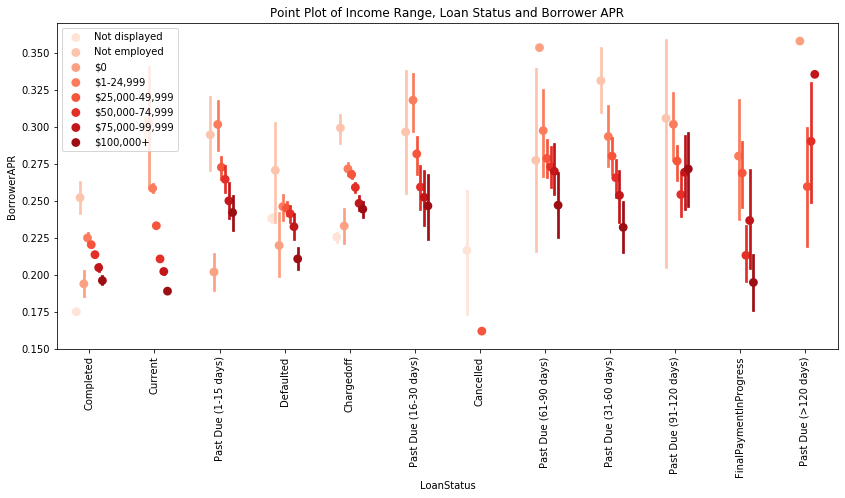

In [12]:
# Point Plot
plt.figure(figsize = [14,6])
sb.pointplot(data = loan, hue = 'IncomeRange', y = 'BorrowerAPR', x='LoanStatus',\
             dodge = 0.4, linestyles = "", palette='Reds');
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.title('Point Plot of Income Range, Loan Status and Borrower APR');